## Basics of Graphing In Python

### Python Libraries
- Matplotlib - creates visualizations
- pandas - data analysis and manipulation tool
- NumPy - provides mathematical functions on arrays

## Importing Python Libraries:

####  import [library] as [insert an alias here]

An alias is how you will refer to the library from here on out when using a module from said library. 

You could use any alias - but to make it easy for anyone else who might have to decipher your code, keep the alias predictable. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading a File into a DataFrame

- Naming variables within python code: use either camel case or snake case.
    - Unformatted variable name: CRPPD Data
    - Snake case: CRPPD_Data
    - Camel case: crppdData

- Two common modules used for this: 
    - pd.read_excel()
    - pd.read.csv()

In [2]:
crppdData = pd.read_excel('CRPPD1000.xlsx')

### What if I refer to the library by name?

In [3]:
crppdData = pandas.read_excel('CRPPD100.xlsx')

NameError: name 'pandas' is not defined

### Checking the list of the attributes and methods of any object

In [4]:
print(dir())

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_ih', '_ii', '_iii', '_oh', 'crppdData', 'exit', 'get_ipython', 'np', 'pd', 'plt', 'quit']


### Checking the DataFrame
To see if the data loaded is the data you're hoping to use

In [5]:
crppdData.head()

,0Phys Props LabID,Sample Name *,Alt Sample Name,SMS Curation Number,Previous Mira RPDS ID,StationName/Well ID/BoreholeName *,Location area,Location Description,Mapped By *,Date Mapped (yyyy/mm/dd) *,...,KN Sample Lab,KN Sample Quality,RES Sample Value [Ohm.m],RES Sample Methodology,RES Sample Lab,RES Sample Quality,CHG Sample Value [ms],CHG Sample Methodology,CHG Sample Lab,CHG Sample Quality
0,AB00001,PM-DKK01,,NaN,RKS-PM-DKK01,PM-DKK01,Southern Rockies,NaN,Enkin RJ,1996,...,GSC,A,5619.194715,Solartron 1260 Impedance Spectrometer,GSC,A,NaN,NaN,NaN,NaN
1,AB00002,PM-DKK02,RKS-PM-DKK02,NaN,RKS-PM-DKK02,PM-DKK02,Southern Rockies,NaN,Enkin RJ,1996,...,GSC,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AB00003,PM-DKK04,RKS-PM-DKK04,NaN,RKS-PM-DKK04,PM-DKK04,Southern Rockies,NaN,Enkin RJ,1996,...,GSC,A,25665.688679,Solartron 1260 Impedance Spectrometer,GSC,A,NaN,NaN,NaN,NaN
3,AB00004,PM-DKK05,RKS-PM-DKK05,NaN,RKS-PM-DKK05,PM-DKK05,Southern Rockies,NaN,Enkin RJ,1996,...,GSC,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AB00005,PM-DKK06,RKS-PM-DKK06,NaN,RKS-PM-DKK06,PM-DKK06,Southern Rockies,NaN,Enkin RJ,1996,...,GSC,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What about checking a certain column within the DataFrame?
#### [DataFrame]['[Column]']

In [6]:
crppdData['Lithology*']

0      carbonate rock
1      carbonate rock
2        conglomerate
3           sandstone
4        conglomerate
            ...      
995         quartzite
996         monzonite
997         monzonite
998            schist
999            schist
Name: Lithology*, Length: 1000, dtype: object

## Plotting with Matplotlib.pyplot
### Setting up Variables to Graph

Example: plotting Density vs Density Rank (similar to Figure 2 from "The Henkel Petrophysical Plot: Mineralogy and Lithology From Physical Properties)

In [15]:
x = crppdData['SAT BULK DEN Sample Value [g/cm3]'].rank(ascending=True)

In [16]:
y = crppdData['SAT BULK DEN Sample Value [g/cm3]']

### Creating a Plot

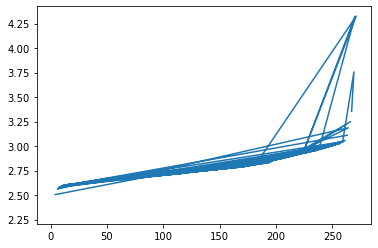

In [24]:
fig = plt.plot(x,y)
plt.show()

### *Well... that's not what we were hoping for. So what went wrong?*

What did the variables look like?

In [18]:
print(x,y)

0       62.0
1       75.0
2       31.0
3        NaN
4        NaN
       ...  
995    218.0
996     64.0
997      NaN
998    219.0
999    102.0
Name: SAT BULK DEN Sample Value [g/cm3], Length: 1000, dtype: float64 0      2.663609
1      2.689822
2      2.628021
3           NaN
4           NaN
         ...   
995    2.918759
996    2.666188
997         NaN
998    2.919564
999    2.709166
Name: SAT BULK DEN Sample Value [g/cm3], Length: 1000, dtype: float64


### Obviously, plotting (210,2.69), (197,2.62) and so forth will create an odd graph. 
### Let's try that again with ordered values

[DataFrame].sort_values() where sort_values is a function in pandas

In [49]:
x = x.sort_values()
y = y.sort_values()

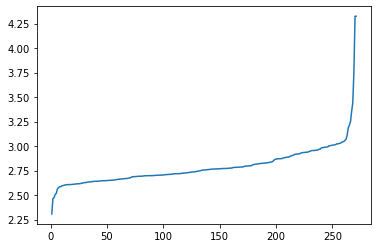

In [54]:
fig = plt.plot(x,y)
plt.show()

### Better. Now how about some labels and a bit of *style*

- plt.plot
    - 'ok' - where 'o' is for the marker style and 'k' is for the marker colour

#### Some Marker, Line, and Colour References
| Marker | Description | | Line | Description | Colour | Description |
| --- | --- | --- | --- | ---| --- | --- |
| 'o' | Circle | | '-'| Solid line| 'r | Red|
| '*' | Star | | ':'| Dotted line| 'g' | Green |
| '.' | Point | |'--' | Dashed line | 'b' | Blue
| ',' | Pixel | | '-.| Dashed/dotted line| 'c' | Cyan |
| 'x' | X | | | | 'm' | Magenta |
| 'X' | X (filled) | | | | 'y' | Yellow |
| '+' | Plus | | | | 'k' | Black |
| 'P' | Plus (filled)| | | | 'w' | White |
| 's' | Square | | | | ||
| 'D' | Diamond | | | |||
| 'd' | Diamond (thin) | | | |||
| '^' | Triangle (up) | | | |||
| 'v' | Triangle (down) | | | |||


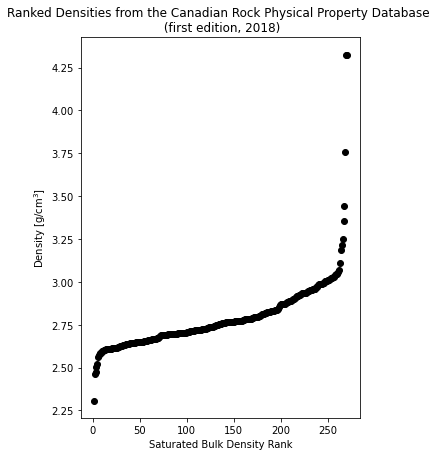

In [95]:
fig = plt.figure(figsize=(5,7))
plt.plot(x,y,'ok')

plt.title('Ranked Densities from the Canadian Rock Physical Property Database \n (first edition, 2018)')
plt.xlabel("Saturated Bulk Density Rank")
plt.ylabel("Density [g/cm$^3$]")

# use _{[value]}$ to write in subscript and $^[value]$ to write in superscript

plt.show()

### Setting limits on the x and y axes

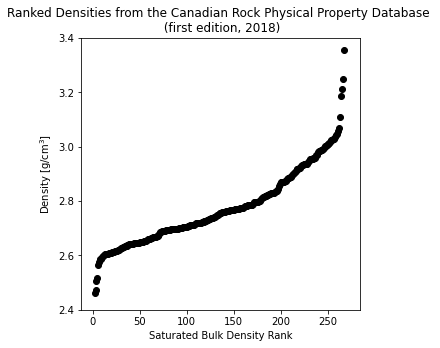

In [93]:
fig = plt.figure(figsize=(5,5)) #change in figsize
plt.plot(x,y,'ok')

plt.title('Ranked Densities from the Canadian Rock Physical Property Database \n (first edition, 2018)')
plt.xlabel("Saturated Bulk Density Rank")
plt.ylabel("Density [g/cm$^3$]")

plt.ylim(2.4,3.4)

plt.show()